In [18]:
import sys
sys.path.append("../") # go to parent dir to import utilities
import lib_neus_et as neus

import numpy as np

In [19]:
# Directory containing the patients' data, one for each subject

data_path= '../data/'

# Task name
task = 'Dummy'

# Screen info
sc_info = {'diagonal' : 60, 'distance' : 60.0, 'resolution' : {'width' : 1920, 'height' : 1080}, 'size' : {'width' : 521, 'height' : 293}}

In [20]:
# Select a file

pat_files = neus.getUsers(data_path, 'example')
print(len(pat_files))
f = pat_files[0]
f

1


'../data/001/test-example-sl-0.json'

In [21]:
# The correct task can be accessed by a factory

a = neus.tasks.TaskFactory(task)

In [22]:
# The screen object is initialized

sc = neus.Screen(sc_info)

In [23]:
# Preprocess data

dt, task_df, info = neus.preprocessData(f, 'meta', True)

          Test ID: 9
    Eyetracker ID: IS404-101107121473
     Test version: f67cf6e
Screen resolution: 1920x1080

Sorting data.
Checking for back button use.
Parsing data into separate tasks.
  Dummy task found 1x.
End of test detected; data read in full.



A list of the available tasks is printed. Data is saved as a list in *dt*

In [24]:
# Repetition
idx = 0

# Slice the section partaining to the task
d = dt[task_df[task][idx][0]:task_df[task][idx][1]]

# Initialize an ET_Data object containing the ET raw data for the slice
et = neus.datasets.ET_Data(d, sampling = 90, screen=sc)


In [25]:
# Pursuit parameters

params = {"max_nan" : 14,
    "fix_params" : {"minimum_duration" : 0.15,
                          "max_dist" : 30,
                          "max_nan" : 14,
                          "mode" : "pixel"}}

In [26]:
# Create the task object

b = a(et, {})

print(type(b))

<class 'lib_neus_et.tasks.dummy.Dummy'>


In [27]:
# Compute features
f_data = b.compute(verbose=True, **params)


Computing features of Dummy task.


In [28]:
# Features can be accessed
f_data._data

[{'dummy.nan': {'L': 0.4961133973479652,
   'R': 0.5016003657978967,
   'M': 0.4897119341563786,
   'join': nan},
  'dummy.fix_num': {'L': 20, 'R': 19, 'M': 17, 'join': nan},
  'dummy.cat': {'L': nan, 'R': nan, 'M': nan, 'join': 'A'}}]

In [29]:
# Best eye

f_data_be = b.compute_best_eye(verbose=True)

In [30]:
f_data_be

[{'dummy.nan': 0.4897119341563786, 'dummy.fix_num': 19, 'dummy.cat': 'A'}]

In [31]:
# Explain the naming convention for the task

b.explain_naming()

Naming convention of Dummy task:

<task>.<feature>

where <task> is "dummy" and <feature> is the name of the feature. For more information on the features use the method "get_feat_names".


In [32]:
# Let's check the features names
b.get_feat_names(descriptions=True)

['nan : Percentage missing values.',
 'fix_num : Number of fixations.',
 'cat : Category of dummy. (Always A in example).']

## Plot test

Then we can visualize gaze trajectories


Computing features of Dummy task.


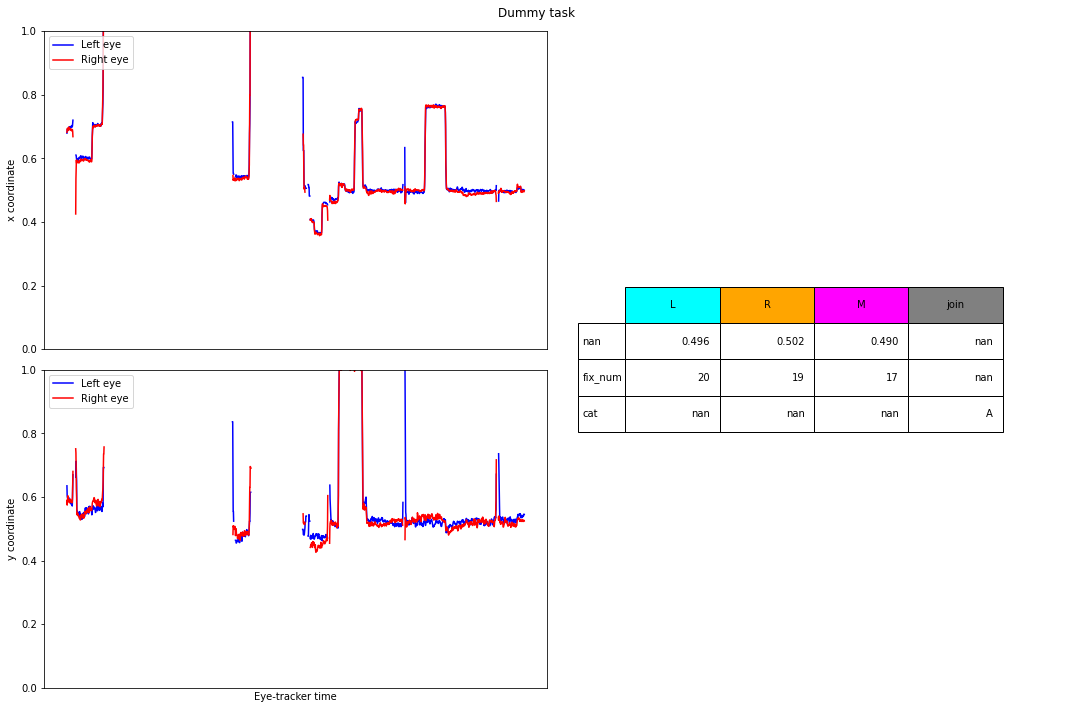

In [33]:
b.plot(figsize=(15,10), plot_features=True)